# 课堂练习 （第二周）
## 计算机浮点数的表示

In [1]:
# Check the following calculation
from math import sqrt

a = 2
b = sqrt(2)

print(b**2 - a)
print(a == b**2)    # 判断是否相等，输出应为False

4.440892098500626e-16
False


In [2]:
# Overflow case

large = 2.**1021
for i in range(3):
    large *= 2
    print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf


In [3]:
# Underflow case

small = 1/2**50
for i in range(3):
    small /= 2
    print(i, 1 + small, small)

0 1.0000000000000004 4.440892098500626e-16
1 1.0000000000000002 2.220446049250313e-16
2 1.0 1.1102230246251565e-16


In [4]:
# Comparing floats

xt = 0.1 + 0.2
print(xt == 0.3)

False


In [5]:
xt

0.30000000000000004

In [6]:
abs(xt - 0.3)

5.551115123125783e-17

In [7]:
abs(xt - 0.3) < 1.e-12

True

In [8]:
# Compensate summation (Kahan summation)

(0.7 + 0.1) + 0.3

1.0999999999999999

In [9]:
0.7 + (0.1 + 0.3)

1.1

In [10]:
xt = 1.e20
yt = -1.e20
zt = 1.

print( (xt + yt) + zt )
print( xt + (yt + zt) )

1.0
0.0


In [11]:
def kahansum(xs): 
    s = 0.
    e = 0. 
    for x in xs: 
        temp = s 
        y = x + e 
        s = temp + y
        e = (temp - s) + y 
    return s


xs = [123456789 + 0.01*i for i in range(10)]
# xs = [0.7, 0.1, 0.3] 
print(sum(xs), kahansum(xs))

1234567890.4499996 1234567890.45


## 编写函数与Numpy数组：热平衡时简谐振子的平均能量

根据量子力学可知，简谐振子的本征能量为 $E_n = \hbar \omega (n + 1/2)$。温度为 $T$ 时，各本征态上的粒子布居概率为 $p_n = e^{-\beta E_n}$，其中 $\beta = 1 / (k_B T)$，$k_B$ 是玻尔兹曼常数。体系的平均能量应为

$$
\bar{E} = \frac{1}{Z} \sum_{n=0}^{N \to \infty} p_n E_n, ~~~~ Z = \sum_{n=0}^{N \to \infty} p_n.
$$

取 $\hbar = \omega = 1, \beta = 1 / 100$。实际计算时，必须给定 $n \leq N$（$N$为某一固定整数），具体见下面代码：

In [12]:
'''
qsho.py: average energy of a harmonic oscillator at finite temperature
ref: Mark Newman's 'Computational Physics' textbook, chap. 4 (p. 135), 
but added the codes using Numpy array.
'''
from math import exp 

terms = 10     # No. of eigenstates considered (n <= terms)
beta = 1/100   
S = 0.0    # sum of 
Z = 0.0    

for n in range(terms):
    E = n + 0.5 
    weight = exp(-beta*E)
    S += weight * E 
    Z += weight 

print(S/Z)

4.917513884193951


1. **试着将上面求解过程写成函数形式，类似为：**

```python
def ave_energy(beta, terms):
    S = 0.0
    Z = 0.0
    #### 写下你的代码 #####

    #####################
    return S/Z

beta = 1 / 100
terms = 1000
result = ave_energy(beta, terms)
print(result)
```

In [13]:
from math import exp 
import time

def ave_energy(beta, terms):
    S = 0.0
    Z = 0.0
    for n in range(terms):
        E = n + 0.5
        weight = exp(-beta*E)
        S += weight * E
        Z += weight 
    return S / Z 

beta = 1/100
terms_list = [1000, 10000, 100000, 1000000]

for terms in terms_list:
    start = time.time()
    Eavg = ave_energy(beta, terms)
    duration = time.time() - start     # time consuming to calculate the average energy (dependent to terms)
    print(terms, Eavg, duration*1e3) 

1000 99.95543134093475 0.22292137145996094
10000 100.00083333194436 4.646778106689453
100000 100.00083333194436 40.863990783691406
1000000 100.00083333194436 293.6689853668213


2. 用`numpy`的数组替代上面的元素操作（elementwise），计算速度会大大加快，尤其是在数组比较大的情况。注意 `np.sum(), np.exp()`等。

In [14]:
import time 
import numpy as np 

beta = 1. / 100
terms_list = [1000, 10000, 100000, 1000000]

for terms in terms_list:
    start = time.time()
    E = np.arange(terms) + 0.5
    weight = np.exp(- beta*E)
    Z = np.sum(weight)
    S = np.sum(weight * E)
    duration = time.time() - start
    print(terms, S/Z, duration*1e3) 

1000 99.95543134093475 0.11110305786132812
10000 100.00083333194445 0.5457401275634766
100000 100.00083333194445 2.722024917602539
1000000 100.00083333194445 23.294925689697266


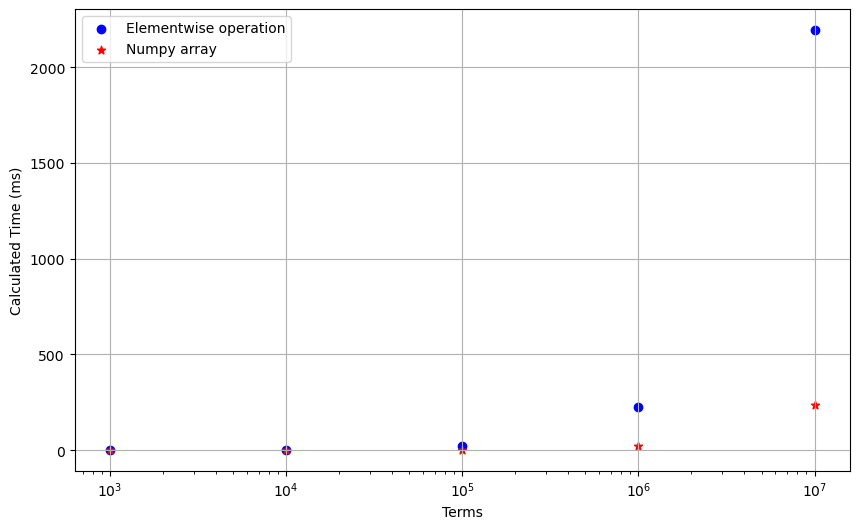

In [15]:
import time 
from math import exp 
import numpy as np 
import matplotlib.pyplot as plt 

def ave_energy1(beta, terms):
    """
    逐个元素方法赋值
    """
    S = 0.0
    Z = 0.0
    for n in range(terms):
        E = n + 0.5
        weight = exp(-beta*E)
        S += weight * E
        Z += weight 
    return S / Z 

def ave_energy2(beta, terms):
    """
    用numpy数组直接计算
    """
    E = np.arange(terms) + 0.5 
    weight = np.exp(-beta * E)
    return np.sum(E * weight) / np.sum(weight)
    
beta = 1. / 100
# terms_list = [1000, 10000, 100000, 1000000]   # 注意必须是整数
terms_list = [int(i) for i in [1e3, 1e4, 1e5, 1e6, 1e7]]
E1 = []
E2 = []
T1 = []
T2 = []

# 注意列表可用append方法逐一添加元素
for terms in terms_list:
    start = time.time()
    E1.append(ave_energy1(beta, terms))    # 逐元素循环累计求和方法计算平均能量
    T1.append(1e3*(time.time() - start))

    start = time.time()
    E2.append(ave_energy2(beta, terms))    # 用numpy数组方法计算平均能量
    T2.append(1e3*(time.time() - start))


plt.figure(figsize=(10, 6))
plt.scatter(terms_list, T1, color='blue', marker='o', label='Elementwise operation')
plt.scatter(terms_list, T2, color='red', marker='*', label='Numpy array')
plt.grid()
plt.xscale("log")    # 以10为底的指数坐标
plt.xlabel('Terms')
plt.ylabel('Calculated Time (ms)')
plt.legend()
plt.show()

## 数值求导数

In [16]:
from math import sin, cos, exp

def f(x):
    # 目标函数
    return exp(sin(2*x))

def fprime(x):
    # 目标函数导数的解析表达式
    return 2 * cos(2*x) * exp(sin(2*x))

def calc_fd(f, x, h):
    # 前向差分
    fd = (f(x+h) - f(x)) / h
    return fd

def calc_cd(f, x, h):
    cd = (f(x+h/2) - f(x-h/2)) / h
    return cd

x = 0.5
ans = fprime(x)

hs = [10**(-i) for i in range(1, 14)]
fds = [abs(calc_fd(f, x, h) - ans) for h in hs]
cds = [abs(calc_cd(f, x, h) - ans) for h in hs]

rowf = "{0:1.0e} {1:1.16f} {2:1.16f}" 
print("h       abs. error in fd     abs. error in cd") 
for h,fd,cd in zip(hs,fds,cds): 
    print(rowf.format(h,fd,cd))

h       abs. error in fd     abs. error in cd
1e-01 0.3077044583376249 0.0134656094697689
1e-02 0.0260359156901186 0.0001350472492652
1e-03 0.0025550421497806 0.0000013505116288
1e-04 0.0002550180941236 0.0000000135077878
1e-05 0.0000254969542519 0.0000000001051754
1e-06 0.0000025492660578 0.0000000002500959
1e-07 0.0000002564334673 0.0000000011382744
1e-08 0.0000000255070782 0.0000000189018428
1e-09 0.0000000699159992 0.0000000699159992
1e-10 0.0000021505300500 0.0000021505300500
1e-11 0.0000332367747395 0.0000111721462455
1e-12 0.0001220546167096 0.0001220546167096
1e-13 0.0023425006659599 0.0020983914325408


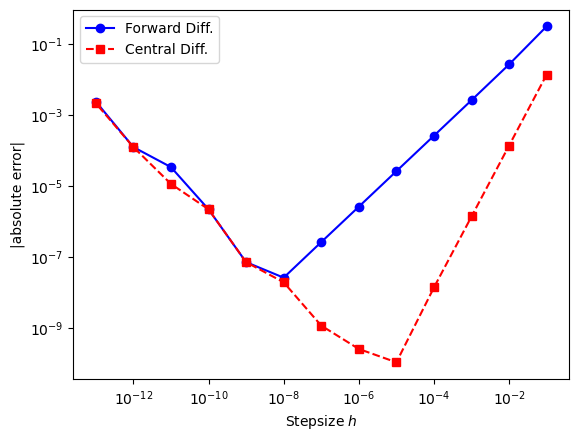

In [17]:
import matplotlib.pyplot as plt 

plt.loglog(hs, fds, 'b-o', hs, cds, 'r--s')
plt.xlabel('Stepsize $h$')
plt.ylabel('|absolute error|')
plt.legend(['Forward Diff.', 'Central Diff.'])
plt.show()